In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from mpl_toolkits.mplot3d import Axes3D

In [76]:
#Load the data
df = pd.read_csv("./machine_learning_examples/linear_regression_class/data_2d.csv", header=None, dtype=float, names=['x1','x2','y'])

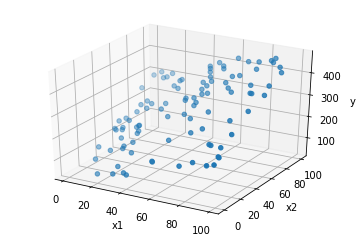

In [18]:
#Graphicate the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'],df['x2'],df['y'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()
plt.close()

In [16]:
def multiple_lr(x,y):
    w=np.linalg.solve(np.dot(x.T,x),np.dot(x.T,y))
    yhat=np.dot(x,w)
    d1=y-yhat
    d2=y-y.mean()
    r2=1-d1.dot(d1)/d2.dot(d2)
    return(w,yhat,r2)

In [69]:
x=df[['x1','x2']]
print(multiple_lr(x,df['y'])[2])

0.997978065087


### Polynomial Regression

In [4]:
#Load the data
dp = pd.read_csv("./machine_learning_examples/linear_regression_class/data_poly.csv", header=None, dtype=float, names=['x','y'])

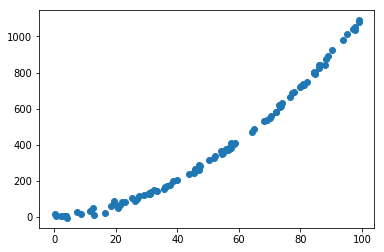

In [5]:
plt.scatter(dp['x'],dp['y'])
plt.show()
plt.close()

In [14]:
l=dp['x'].values.tolist()
X=[]
for i in l:
    X.append([1,i,i**2])
x=np.array(X)

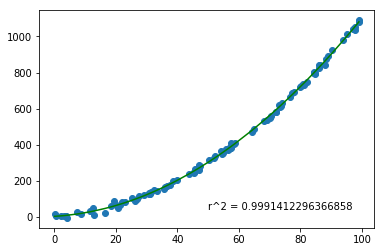

In [26]:
#Calculate yhat and plot
sol=multiple_lr(x,dp['y'])
plt.scatter(dp['x'],dp['y'])
plt.plot(dp['x'].sort_values(ascending=True),np.sort(sol[1]),color='green')
plt.text(50,40,'r^2 = {}'.format(sol[2]))
plt.show()
plt.close()

### Exercise

#### The objective is to predict the systolic blood pressure, where:
- x1=systolic blood pressure
- x2=age in years
- x3=weight in pounds

In [57]:
#Read the excel file
de = pd.read_excel("./machine_learning_examples/linear_regression_class/mlr02.xls")
de=de.sort_values(by=['X1','X2','X3'], ascending=True)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


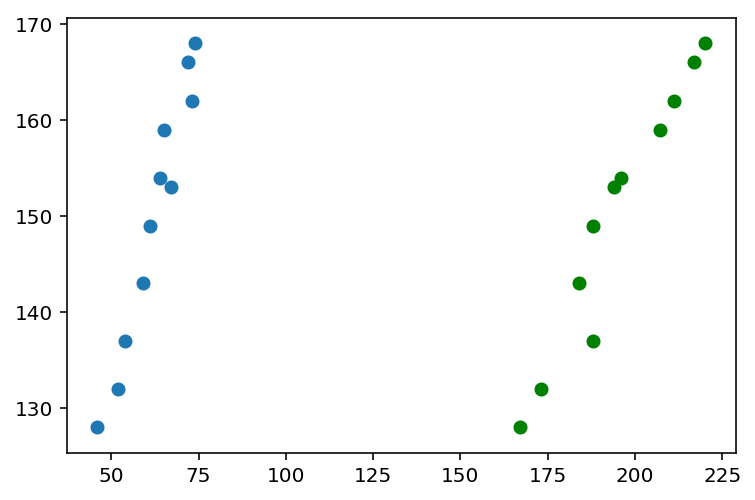

In [58]:
plt.scatter(de['X2'],de['X1'])
plt.scatter(de['X3'],de['X1'],color='green')
plt.show()
plt.close()

In [59]:
de['ones']=1
y=de['X1']
x=de[['X2','X3','ones']]
x2only=de[['X2','ones']]
x3only=de[['X3','ones']]

In [60]:
print("r2 for x2 only: {}".format(multiple_lr(x2only,de['X1'])[2]))
print("r2 for x3 only: {}".format(multiple_lr(x3only,de['X1'])[2]))
print("r2 for both: {}".format(multiple_lr(x,de['X1'])[2]))

r2 for x2 only: 0.9578407208147355
r2 for x3 only: 0.9419952085293065
r2 for both: 0.9768471041502091


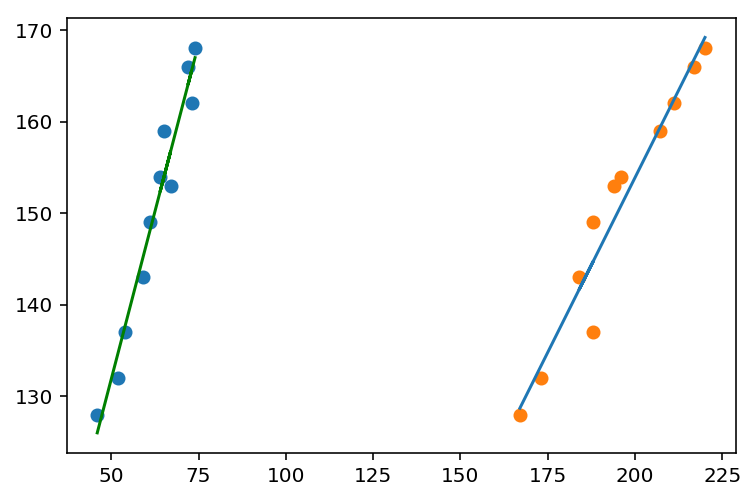

In [61]:
plt.scatter(de['X2'],de['X1'])
plt.plot(de['X2'],multiple_lr(x2only,de['X1'])[1],color='green')
plt.scatter(de['X3'],de['X1'])
plt.plot(de['X3'],multiple_lr(x3only,de['X1'])[1])
plt.show()
plt.close()

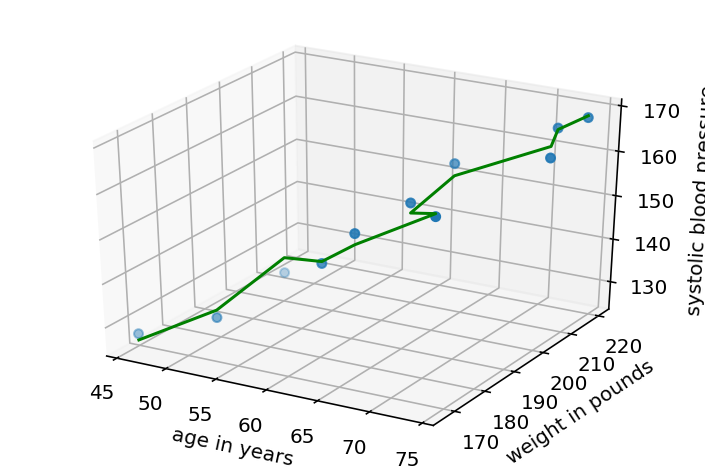

In [62]:
%config InlineBackend.figure_format = 'retina'
#Graphicate the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(de['X2'],de['X3'],de['X1'])
ax.plot(de['X2'],de['X3'],multiple_lr(x,de['X1'])[1],color='green')
ax.set_xlabel('age in years')
ax.set_ylabel('weight in pounds')
ax.set_zlabel('systolic blood pressure')
plt.show()
plt.close()